# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

# Import your own code
from Household import HouseholdSpecializationModelClass

# Question 1

**Explain how you solve the model**

In [7]:
# a. Load model as the household class
model = HouseholdSpecializationModelClass()

# b. Defining the axis-values and empty H-ratio matrix for optimal solutions
N = 3
alpha_vec = np.linspace(0.25,0.75,N)
sigma_vec = np.linspace(0.5,1.5,N)
H_ratio = np.zeros((N,N))

# c. Looping through alpha and sigma, solve optimal allocation and input into H-raitio matrix
for i, alpha in enumerate(np.linspace(0.25,0.75,3)):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(np.linspace(0.5,1.5,3)):
        model.par.sigma = sigma #set sigma value given the alpha value
        
        opt = model.solve_discrete() #Optimal allocation solution
        HF = opt.HF
        HM = opt.HM
        H_ratio[i,j] = HF/HM #Input H_ratio into matrix

print(H_ratio)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Plotting the figure in 3d

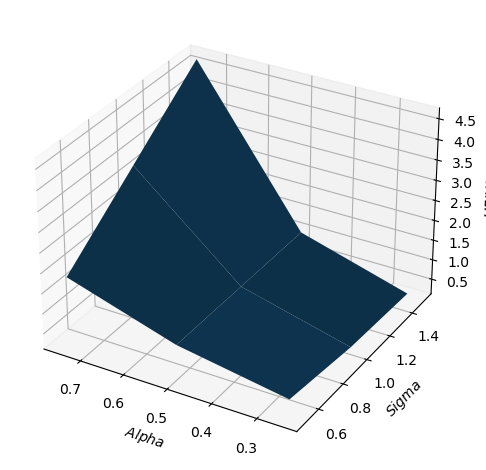

In [8]:
from matplotlib import cm # for colormaps
# %matplotlib widget

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,H_ratio)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$HF/HM$')

# c. invert xaxis
ax.invert_xaxis()

# tight layout 
fig.tight_layout()

# Question 2

Explain your code and procedure

In [9]:
# b. Defining the axis-values and empty H-ratio matrix for optimal solutions
N = 5
WF_vec = np.linspace(0.8,1.2,N)
logw_ratio = np.empty(N)
logH_ratio = np.empty(N)

# # c. solve optimal allocation for different wF
for i, wF in enumerate(np.linspace(0.8,1.2,N)):
    model.par.wF = wF #set wF value
        
    opt = model.solve_discrete() #Optimal allocation solution
    HF = opt.HF
    HM = opt.HM
    logw_ratio[i] = np.log(wF/model.par.wM)
    logH_ratio[i] = np.log(HF/HM) 

print(logH_ratio)
print(logw_ratio)

[2.07944154 1.60943791 1.54044504 1.54044504 1.46633707]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


Plot Solution

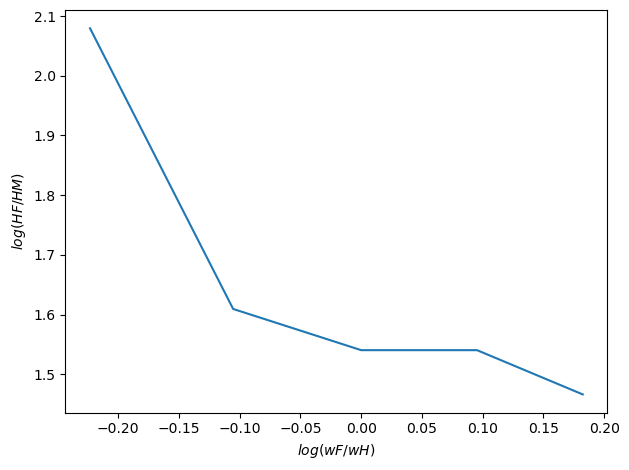

In [12]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(logw_ratio,logH_ratio)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')

# tight layout 
fig.tight_layout()

# Question 3

Explain your code and procedure

In [ ]:
print(solve())

ADD CONCISE CONLUSION.